In [2]:
# Import necessary libraries
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Establish a connection to PostgreSQL database
conn = psycopg2.connect(
    dbname="sales_db",
    user="postgres",
    password="8484123",
    host="localhost",
    port="5432"
)

In [6]:
# Create a query to fetch sales data
query = """
SELECT f.sales_id, f.total_sales, f.date_id, p.product_name, c.customer_name
FROM fact_sales f
JOIN dim_product p ON f.product_id = p.product_id
JOIN dim_customer c ON f.customer_id = c.customer_id
"""

In [8]:
# Use pandas to execute the query and load data into a DataFrame
df = pd.read_sql_query(query, conn)

C:\Users\HP\AppData\Local\Temp\ipykernel_20172\3858274778.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [10]:
# Show the first few rows of the DataFrame
df.head()

,sales_id,total_sales,date_id,product_name,customer_name
0,1,2400.0,1,Laptop,John Doe
1,2,800.0,2,Smartphone,Jane Smith
2,3,450.0,3,Headphones,Emily Johnson
3,4,500.0,4,Gaming Console,Michael Brown


In [12]:
# Close the connection
conn.close()

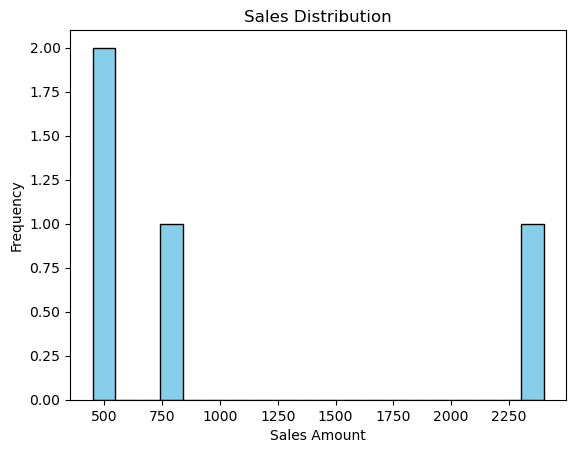

In [14]:
# Plotting a simple sales distribution
df['total_sales'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Sales Distribution')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()